In [1]:
import json

import networkx as nx
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

In [2]:
with open('../data/raw/followed_artists.json') as f:
    artists = json.load(f)

In [3]:
artists_dict = {}
artists_dict['id'] = [i['id'] for i in artists]
artists_dict['artist'] = [i['name'] for i in artists]
artists_dict['followers'] = [i['followers']['total'] for i in artists]
artists_dict['popularity'] = [i['popularity'] for i in artists]
# artists_dict['image_url'] =  [i['images'][0]['url'] for i in artists]
artists_dict['related_artist'] = [i['related_artists'] for i in artists]
# artists_dict['related_id'] = [i['related_ids'] for i in artists]

In [9]:
df = pd.DataFrame.from_dict(artists_dict)

In [10]:
df.head()

,id,artist,followers,popularity,related_artist
0,04Lk4wB0qijus8AOGYiHg8,Herman Düne,25446,43,"[David Ivar Herman Dune, Stanley Brinks, The W..."
1,066X20Nz7iquqkkCW6Jxy6,LCD Soundsystem,827471,66,"[Hot Chip, The Rapture, !!!, TV On The Radio, ..."
2,06nsZ3qSOYZ2hPVIMcr1IN,J.J. Cale,501743,67,"[Peter Green, John Mayall & The Bluesbreakers,..."
3,099toTcKJoywTosZr2hHjy,Langhorne Slim,135617,61,"[Blitzen Trapper, Rayland Baxter, Shovels & Ro..."
4,09VsCALGBjeVE3pq9k085d,My Bubba,16223,38,"[Pascal Pinon, Mountain Man, Júníus Meyvant, J..."


In [5]:
# "melt" name list into individual rows
# https://stackoverflow.com/questions/27263805/pandas-column-of-lists-create-a-row-for-each-list-element

lst_col = 'related_artist'

r = pd.DataFrame({
      col:np.repeat(df[col].values, df[lst_col].str.len())
      for col in df.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns]

In [19]:
r.loc[r['related_artist'].str.contains('\$')]

,id,artist,followers,popularity,related_artist
1756,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,16770291,90,A$AP Rocky
1764,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,16770291,90,Joey Bada$$


In [20]:
# temp fix to remove special characters from name (Joey Bada$$ and A$AP Rocky were throwing errors)
r['artist'] = r['artist'].str.replace('$', 'S')
r['related_artist'] = r['related_artist'].str.replace('$', 'S')

<ipython-input-20-5e25f823d8ee>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  r['artist'] = r['artist'].str.replace('$', 'S')
<ipython-input-20-5e25f823d8ee>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  r['related_artist'] = r['related_artist'].str.replace('$', 'S')


In [21]:
r.loc[r['related_artist'].str.contains('\$')]

,id,artist,followers,popularity,related_artist


In [22]:
G = nx.from_pandas_edgelist(r, 
                            source='artist',
                            target='related_artist',
                            edge_attr='followers',
                            create_using=nx.DiGraph())

/Users/colinspear/.venv/music/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 41594 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/colinspear/.venv/music/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 3901 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/colinspear/.venv/music/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2951 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/colinspear/.venv/music/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 3968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/colinspear/.venv/music/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 3854 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/colinspear/.venv/music/lib/python3.9/site-packa

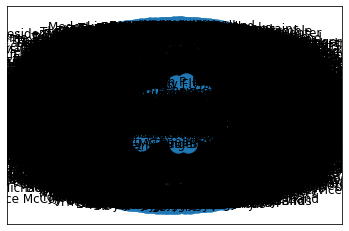

In [23]:
nx.draw_networkx(G)

In [24]:
r_graph = r.sample(100)
G = nx.from_pandas_edgelist(r_graph, 
                            source='artist',
                            target='related_artist',
                            edge_attr='followers',
                            create_using=nx.DiGraph())

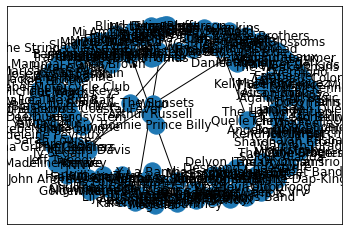

In [25]:
nx.draw_networkx(G)

In [26]:
r_graph = r.sample(500)
G = nx.from_pandas_edgelist(r_graph, 
                            source='artist',
                            target='related_artist',
                            edge_attr='followers',
                            create_using=nx.DiGraph())

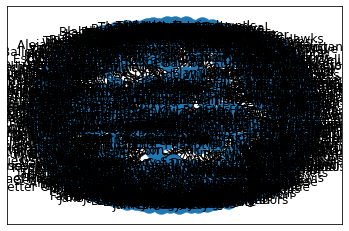

In [27]:
nx.draw_networkx(G)

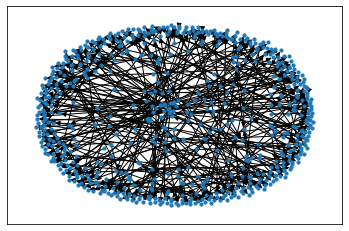

In [28]:
nx.draw_networkx(G, with_labels=False, node_size=10)

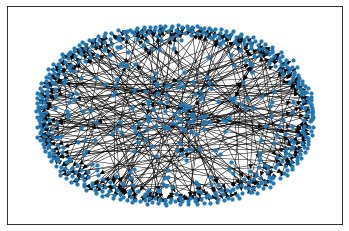

In [29]:
nx.draw_networkx(G, with_labels=False, node_size=10, width=0.5)